**LOGS:**


*   6 June: Using KEGG and class_weights, f1-macro = 0.81 [with the graphs coordinated scaled to match with eigenvectors' bounds]
*   TODO: Same for PPI Network



In [1]:
from __future__ import print_function
import keras
from keras.initializers import TruncatedNormal
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, PReLU
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

Using TensorFlow backend.


In [0]:
randomized = np.load('/content/drive/My Drive/IIITH/randomized_RCC.npy')
randomized_label = np.load('/content/drive/My Drive/IIITH/randomized_label_RCC.npy')
# randomized_label[randomized_label==2]=1

In [3]:
randomized.shape, randomized_label.shape

((889, 100, 400), (889,))

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(randomized, randomized_label, test_size=0.25, random_state=42, stratify=randomized_label)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(666, 100, 400) (223, 100, 400) (666,) (223,)


In [0]:
x_train = x_train.reshape(x_train.shape[0], 100, 400, 1)
x_test = x_test.reshape(x_test.shape[0], 100, 400, 1)
input_shape = (100, 400, 1)

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)


In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (666, 100, 400, 1)
666 train samples
223 test samples


In [0]:
# convert class vectors to binary class matrices
num_classes=3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
model = Sequential()
#1
model.add(Conv2D(32, kernel_size=(1, 4),strides=(1, 4),padding="valid",kernel_initializer=TruncatedNormal(mean=0., stddev=0.1, seed=0),input_shape=input_shape))
model.add(PReLU())
model.add(BatchNormalization())
#2
model.add(Conv2D(512, (5, 5),strides=(1, 1),padding="valid",kernel_initializer=TruncatedNormal(mean=0., stddev=0.1, seed=0)))
model.add(PReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding="same"))
#3
model.add(Conv2D(256, (3, 3),strides=(1, 1),padding="valid",kernel_initializer=TruncatedNormal(mean=0., stddev=0.1, seed=0)))
model.add(PReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding="same"))
#4
model.add(Conv2D(128, (3, 3),strides=(1, 1),padding="valid",kernel_initializer=TruncatedNormal(mean=0., stddev=0.1, seed=0)))
model.add(PReLU())
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2), padding="same"))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3, seed=42))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3, seed=42))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 32)      160       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 100, 100, 32)      320000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 100, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 512)       410112    
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 96, 96, 512)       4718592   
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 512)       2048      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 512)      

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
          batch_size=16,
          epochs=25,
          verbose=1,
          validation_data=(x_test, y_test),
          class_weight=class_weights)

Train on 666 samples, validate on 223 samples
Epoch 1/25
666/666 [==============================] - 10s 14ms/step - loss: 1.2427 - accuracy: 0.4850 - val_loss: 1.6288 - val_accuracy: 0.5830
Epoch 2/25
666/666 [==============================] - 6s 9ms/step - loss: 0.9963 - accuracy: 0.5375 - val_loss: 1.0400 - val_accuracy: 0.5830
Epoch 3/25
666/666 [==============================] - 6s 9ms/step - loss: 0.9532 - accuracy: 0.5330 - val_loss: 1.0492 - val_accuracy: 0.5830
Epoch 4/25
666/666 [==============================] - 6s 9ms/step - loss: 0.9357 - accuracy: 0.5526 - val_loss: 0.9788 - val_accuracy: 0.5830
Epoch 5/25
666/666 [==============================] - 6s 9ms/step - loss: 0.9049 - accuracy: 0.5946 - val_loss: 1.0575 - val_accuracy: 0.5830
Epoch 6/25
666/666 [==============================] - 6s 9ms/step - loss: 0.9344 - accuracy: 0.5390 - val_loss: 1.1259 - val_accuracy: 0.5830
Epoch 7/25
666/666 [==============================] - 6s 9ms/step - loss: 0.9182 - accuracy: 0.5556 

In [0]:
score = model.predict(x_test, verbose=0)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), np.argmax(score, axis=1), target_names=["0","1","2"]))

              precision    recall  f1-score   support

           0       0.92      0.47      0.62        73
           1       0.70      1.00      0.82       130
           2       0.00      0.00      0.00        20

    accuracy                           0.74       223
   macro avg       0.54      0.49      0.48       223
weighted avg       0.71      0.74      0.68       223



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


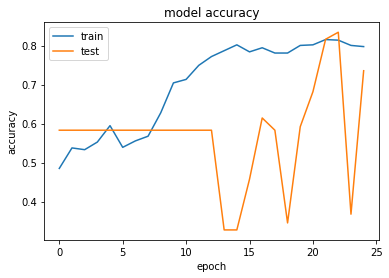

In [16]:
# plot accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

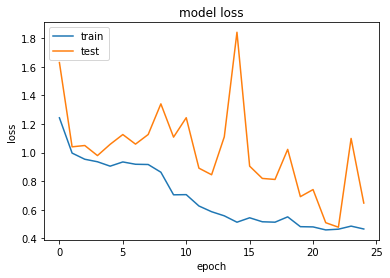

In [17]:
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()